![alt text](images/uspas.png)
# VUV and X-ray Free Electron Lasers
# Project instructions


The Genesis manual can be found here: http://genesis.web.psi.ch/download.html   
##### Instructors: D. Nguyen, P. Anisimov, N. Neveu
##### Teaching Assistant: Y.S. Li
----------

# 1. List your teammates here: 

Niral, En-Chuan, Nathan

# 2. Discuss the machines shown here with your teamates. 

| Parameter               | Marie    | LCLS   |  Deep UV |
| :---:                   | :----:   |   :---:|   :---:  |
| $\lambda_u$  (m)        | 1.86e-2  | 3e-2   |  2.6e-2  |
| $\lambda_r$  (m)        | 2.934e-11| 1.5088e-10| 1.35e-8 |
| Energy (eV)             |  12e9    | 14e9   |  1e9  |
| Relative energy spread  | 1.5e-4   | 1e-4   |  1e-3 |
| Beta                    | 15       | 18     |  12   |
| max current             | 3e3      | 3e3    |  1e3  |
|Emittance (m-rad)        | 0.2e-6   | 0.4e-6 |  0.4e-6 |          




# 3. Give us a list of three machine options for your project. 
You can choose from the machines in #2, or another of your choosing.   
List your preference in order 1-3, with #1 being your preferred project.  

MaRIE

# 4. Project description.

You are free to shape your project to fit your interests.   
There are no limits on what you are allowed to change in the machine.  
(This is a bit unrealistic, but not an issue here.)

Some suggestions/guidance for project components follows. 

Improve or study one or more of the following:
- peak power
- bandwidth
- photon count
- tapering 
- scaled FODO lattice
- current profile impact on performance
- off axis beam impact on performance

These may require, but is not limited to:

- beam size studies/scans and matching 
- $\lambda_r$ studies/scans
- Adjustment of drift spacing
- Energy / energy spread studies
- Convergence study (number of particles, grid, etc)




Discuss with your teamates and write a few sentences or bulleted list detailing what you plan to do in your project.   
We will give you feedback on this. 

===

In [2]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.style.use(r'PaperDoubleFig.mplstyle')

In [4]:
from genesis import Genesis
gen = Genesis('template.in')
gen.run()

In [5]:
gen.input_file

'/tmp/tmptlqxlbyl/genesis.in'

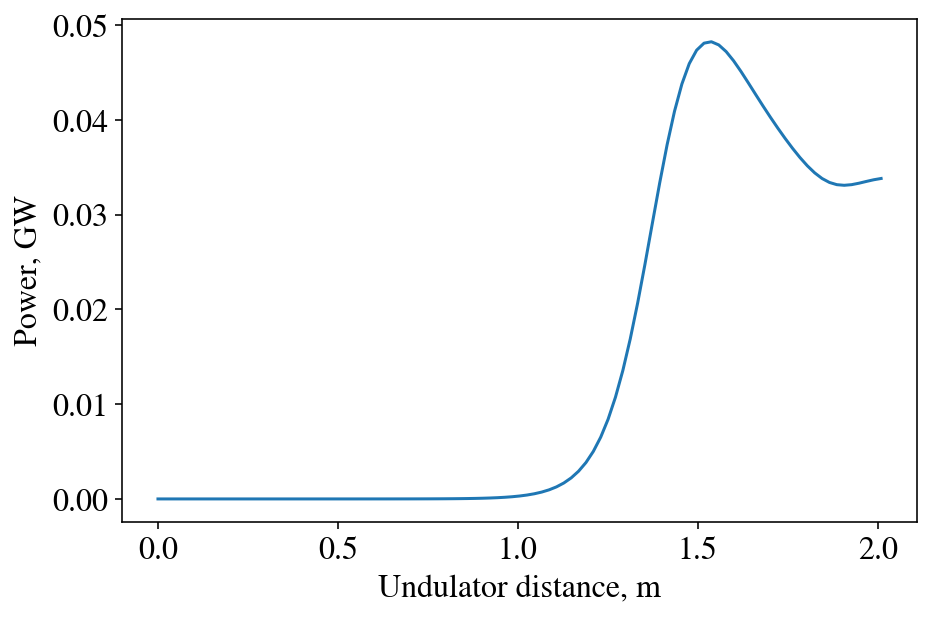

In [6]:
# power output from the genesis template file
plt.plot(gen.output['data']['z'], gen.output['data']['power'][0]/1e9);
plt.xlabel('Undulator distance, m'); plt.ylabel('Power, GW');

In [7]:
genesis_bin='/home/vagrant/.local/bin/genesis2-mpi'
gen = Genesis('template.in', genesis_bin=genesis_bin)
gen.binary_prefixes = ['mpirun', '-n', '10']

In [10]:
# parameters for MaRIE

# undulator
gen['xlamd'] = 0.0186  # undulator wavelength, m
gen['aw0'] = gen['awd'] = 0.86  # rms undulator parameter
gen['nwig'] = int(80/gen['xlamd'])  # undulator length in xlamd

# focusing
gen['f1st'] = 5  # half F length in FODO measured in xlamd
gen['fl'] = 10   # full F length in FODO measured in xlamd
gen['quadf'] = 30  # focusing in x quadrupole gradient, T/m
gen['dl'] = 10   # full D length in FODO measured in xlamd
gen['quadd'] = 30  # defocusing in x quadrupole gradient, T/m
gen['drl'] = 100 # full O length in FODO measured in xlamd

# electron beam
gen['curpeak'] = 3000  # current, A
gen['curlen'] = 0  # negative or 0 for flattop; positive for Gaussian
gen['gamma0'] = 12e9/0.511e6  # beam energy, mc^2
gen['delgam'] = 1.5e-4*gen['gamma0']  # relative energy spread
gen['rxbeam'] = 1.2038964357474105e-05  # rms size, m
gen['rybeam'] = 1.042244688359981e-05  # rms size, m
gen['emitx'] = gen['emity'] = 0.2e-6  # normalized emittance, m rad
gen['npart'] = 2**10  # number of macroparticles in a bucket

# radiation at resonant condition
gen['xlamds'] = gen['xlamd']*(1+gen['aw0']**2)/(2*gen['gamma0']**2)
gen['prad0'] = 1e4  # shot noise power, W
gen['zrayl'] = 24  # Rayleigh length, m
gen['zwaist'] = 0  # focul point location, m

# mesh
gen['ncar'] = 151  # number of mesh points, ODD is advised
gen['dgrid'] = 100e-6  # [-dgrid, dgrid], m

# simulation
gen['delz'] = 1  # integration step measured in xlamd
gen.run()
gen.output['run_info']

{'start_time': 1612033589.6784537,
 'run_script': 'mpirun -n 10 /home/vagrant/.local/bin/genesis2-mpi genesis.in',
 'run_time': 7.382627725601196,
 'run_error': False}

In [11]:
gen.output['data'].keys()

dict_keys(['z', 'aw', 'qfld', 'index', 'current', 'power', 'increment', 'p_mid', 'phi_mid', 'r_size', 'energy', 'bunching', 'xrms', 'yrms', 'error'])

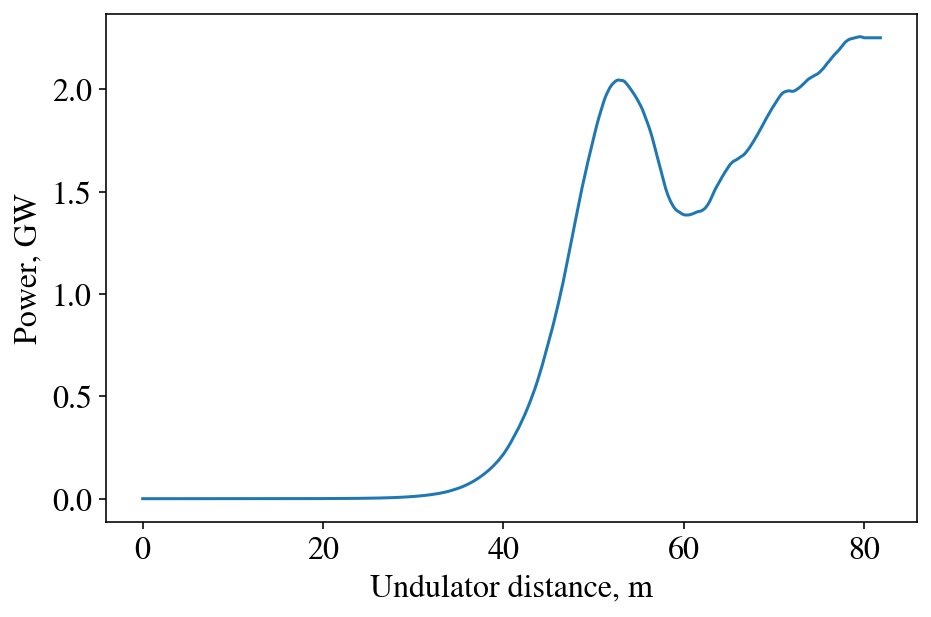

In [12]:
plt.plot(gen.output['data']['z'], gen.output['data']['power'][0]/1e9);
plt.xlabel('Undulator distance, m'); plt.ylabel('Power, GW');